In [22]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
import random

In [5]:
inp_data = input('Write down the name of the .txt file containing your data as filename.txt: ')

Write down the name of the .txt file containing your data as filename.txt: populations.txt


In [6]:
data = np.loadtxt(inp_data)

In [15]:
if len(data[:,:1])<100:
    print('Your data set is too small, results are not relieble')
elif 100 <= len(data[:,:1]) < 500:
    print('Your data set might be too low for reliable results')
else:
    print('The amount of data is sufficient for reliable results')

Your data set is too small, results are not relieble


In [16]:
randomized_data=np.random.permutation(data)

In [17]:
training_data = randomized_data[:int(len(data[:,:1])*2/3),:]

In [18]:
test_data = randomized_data[int(len(data[:,:1])*2/3):,:]

In [19]:
x = np.linspace(1900,1920,256,endpoint = True)

In [20]:
p3 = np.poly1d(np.polyfit(training_data[:,:1].flatten(),training_data[:,1:2].flatten(),3))

In [16]:
plt.plot(x,p3(x),'b-',training_data[:,:1],training_data[:,1:2],'ro')

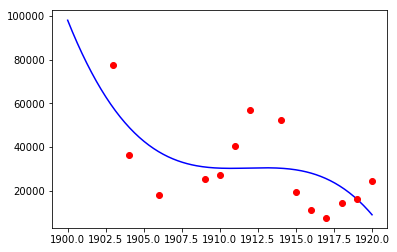

In [17]:
plt.show()

In [18]:
p5 = np.poly1d(np.polyfit(training_data[:,:1].flatten(),training_data[:,1:2].flatten(),5))

C:\Users\peter\Anaconda\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [19]:
plt.plot(x,p5(x),'b-',training_data[:,:1],training_data[:,1:2],'ro')

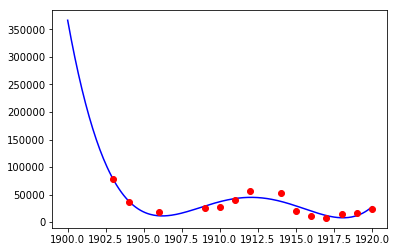

In [20]:
plt.show()

In [21]:
n_times_variance = np.sum((p5(training_data[:,:1].flatten())-training_data[:,1:2].flatten())**2)

In [22]:
sigma = np.sqrt(n_times_variance/len(training_data[:,:1]))

In [23]:
sigma

7550.9923535036241

In [25]:
p5_minus_test_data = np.abs((p5(test_data[:,:1])-test_data[:,1:2]).flatten())

In [26]:
def test(list,number):
    x = []
    for i in range(len(p5_minus_test_data)):
        if p5_minus_test_data[i] < number:
            x.append(p5_minus_test_data)
        return len(x)/len(list)

In [46]:
y = test(test_data,sigma)

In [47]:
print('%f  per cent of the test data is within 1 sigma limit of the best hypothesis.' % y)

0.000000  per cent of the test data is within 1 sigma limit of the best hypothesis.
